In [4]:
%matplotlib inline

import os
import re
from skimage import io
from records import TERMINAL_VELOCITIES, RADIUS
from plot_helper import *
from particle_helper import create_particle
import json  # import the library that stores the particle configurations

with open('particle_configurations.json') as f:
    configurations = json.load(f)

In [5]:
glacier_path = 'Z:\\Mingxuan Liu'
config_name = 'tetramer-pl-wc'  # name of the configuration
folder_name = 'tetramer-pl-wc-1-6fps'
name_light = 'pl'

AttributeError: 'Particle' object has no attribute 'theta'

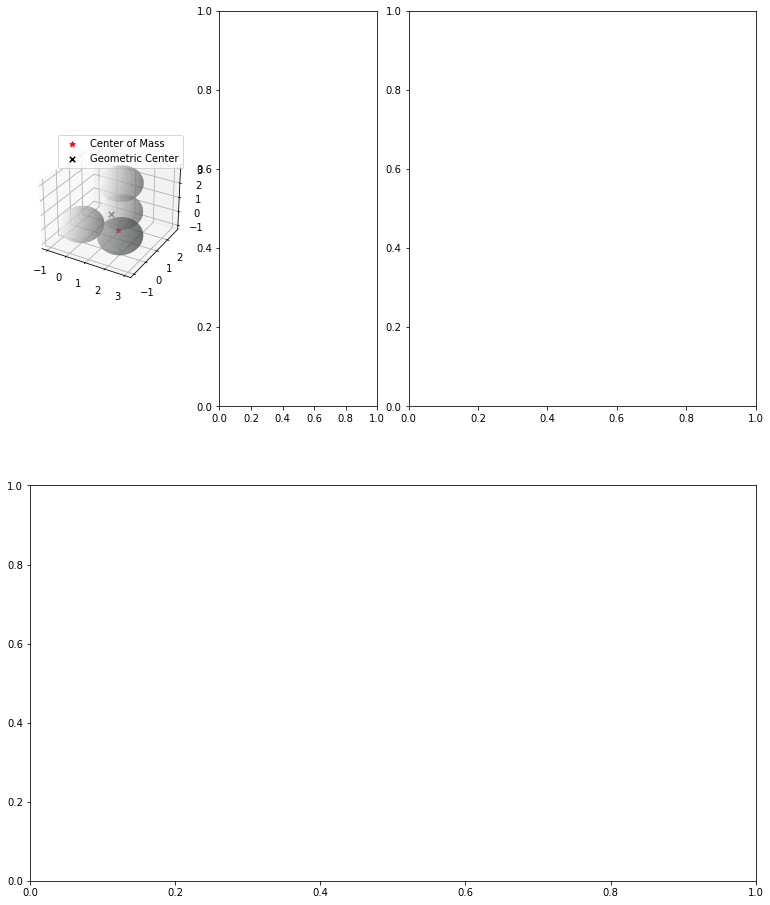

In [6]:
# Create a GridSpec object
fig = plt.figure(figsize=(13, 16))
gs = gridspec.GridSpec(2, 4)  # 2 rows and 4 columns

# Create subplots
ax1 = plt.subplot(gs[0, 0], projection='3d')  # Top left for 3D particle model
ax2 = plt.subplot(gs[0, 1])  # Top middle for the stacked image
ax3 = plt.subplot(gs[0, 2:5])  # Top right for the stretched image, which spans 3 columns
ax4 = plt.subplot(gs[1, :])  # Bottom for the particle's motion

# Plot in each subplot
# 1. Plot the 3D particle model
p = create_particle(config_name)
plot_particle(p, config_name, ax=ax1, transparency=True)

# 2. Plot the stacked and stretched image
tif_path = os.path.join(glacier_path, folder_name, folder_name + '-binary-crop.tif')  # specify the location of binary image
frames = io.imread(tif_path)  # import the binary image sequence
stacked_image = plot_stacked_image(frames, ax=ax2)  # stack the images
plot_stretched_image(stacked_image, ax=ax3)  # pass the stacked image and then stretch it

# 3. Plot the motion
tracking_data = pd.read_csv(os.path.join(glacier_path, folder_name, folder_name + ' binary.csv'))  # import the .csv tracking data
fps = int(re.findall(r'(\d+)fps', folder_name)[0])  # extract the frame rate from the folder name using regex
v_light_term = TERMINAL_VELOCITIES[name_light]  # read the terminal velocity of the lightest object
tau = RADIUS / v_light_term  # calculate the time scale
plot_motion(tracking_data, scale=7.12, frame_rate=fps, time_scale=tau, diff_method='five-point', avg_size=20, ax=ax4)

# Adjust the layout
fig.subplots_adjust(hspace=0.05, wspace=0.01)

# Save the figure with 600 dpi
plt.savefig(os.path.join('config_figure', folder_name + '.png'), dpi=600, bbox_inches='tight')
# Show the plot
plt.show()